In [6]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


#### INSTALL PACKAGES

The installation takes a few minutes.

In [5]:
install.packages("keras")
install.packages("dplyr")
install.packages("cgdsr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rappdirs’, ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’




In [7]:
library(keras)
library(dplyr)
library(cgdsr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Please send questions to cbioportal@googlegroups.com



# 1. What you will do in this R Notebook

## Introduction
This is the second day of your training in R for Machine Learning. You will now enter the wide, wild and exciting field of Deep Learning!

Neural Networks and Deep Learning have revolutionized the performance of many Machine Learning tasks: in image analysis, gaming and natural langage understanding, for example.

Again your input is a huge amount of variables (genes expression per patients) and you want to provide the clinician a simple output that he can use for his patients.

I hope you’ll enjoy this Notebook and that it can help you to adress your current and/or future challenges.

## Main steps
After loading TCGA data, we will build and train a simple neural network.

## In practice
The code is provided to you. You will just have to follow the instructions all along the Notebook. I’ll give you a little bit of explanation when needed.

Pay attention: there will be some questions to answer in this notebook.

Finally you will have a partial code to complete at the end of the notebook, and give it back to us.

–> lets’ go!

# 2. Load the data
Keras is a library of functions specifically dedicated to the building, training and testing of a wide range of neural networks. The math is pre-computed, and functions are relatively user-friendly: is a high level API. It can use several lower level back-ends for the math and calculation. We use the default one: Tensorflow. Tensorflow is a way to perform computations with high dimensional data, using computational graphs Keras and Tensorflow have been develloped by Google and are open source.

Load and install Keras.

In [0]:
source("https://raw.githubusercontent.com/gustaveroussy/IFSBM-bigdata/master/TP_IFSBM_module12/2020/labs/lib/LoadcBioportal150119.R")
set.seed(1234)

Select the genes you want to use.

In [9]:
CGS <- read.csv("https://raw.githubusercontent.com/gustaveroussy/IFSBM-bigdata/master/TP_IFSBM_module12/2020/labs/lab_2/data/CancerGeneCensusCOSMIC.csv",stringsAsFactors = F)
GENES <- CGS$Gene.Symbol[CGS$Hallmark=="Yes"]
print(paste("You have selected",length(GENES),"important cancer genes like:", paste(sample(GENES,20), collapse = ", "), "..."))

[1] "You have selected 251 important cancer genes like: AXIN2, CNBP, HIP1, EGFR, TCL1A, ERBB2, FLT3, FGFR3, LEF1, GNAQ, FGFR2, DNM2, EIF4A2, RAF1, DAXX, CDK4, CLTCL1, PTEN, ERCC3, AR ..."


Dowload TCGA data from the LoadcBioportal that you know.

In [10]:
# load TCGA data of lung adenocarcinoma and lung squamous cell carcinoma

# set the argument Organ 
TCGAdata <- LoadcBioportal(
  Genes = GENES, 
  Organ = "luad|lusc",
  ClinicNeeded = T, 
  MutNeeded = F,   
  RNANeeded = T, 
  NormalizeRNA = T, 
  FunctionalAnnot = F, 
  PDF = F, 
  Tests=T
)

getCancerStudies...  OK
getCaseLists (1/2) ...  OK
getCaseLists (2/2) ...  OK
getGeneticProfiles (1/2) ...  OK
getGeneticProfiles (2/2) ...  OK
getClinicalData (1/1) ...  OK
getProfileData (1/6) ...  OK
getProfileData (2/6) ...  OK
getProfileData (3/6) ...  OK
getProfileData (4/6) ...  OK
getProfileData (5/6) ...  OK
getProfileData (6/6) ...  OK
[1] "Pooling : luad_tcga_pub & lusc_tcga"
[1] "Discard HRAS because NAs in RNAseq"


In [40]:
STUDY<-TCGAdata$STUDY
paste(rep("=", 40), collapse="")
paste("Number of patients")
table(TCGAdata$CLINIC$study)
paste("Dimensions TCGAdata$EXP:")
paste("nrow: ", nrow(TCGAdata$EXP))
paste("ncol: ", ncol(TCGAdata$EXP))
paste(rep("=", 40), collapse="")

[1] "========================================"

[1] "Number of patients"


luad lusc 
 230  178 

[1] "Dimensions TCGAdata$EXP:"

[1] "nrow:  408"

[1] "ncol:  250"

[1] "========================================"

# 3. Keras

Keras is a library of functions specifically dedicated to the building, training and testing of a wide range of neural networks. The math is pre-computed, and functions are relatively user-friendly: is a high level API. It can use several lower level back-ends for the math and calculation. We use the default one: Tensorflow. Tensorflow is a way to perform computations with high dimensional data, using computational graphs Keras and Tensorflow have been develloped by Google and are open source.

## 3.1 Model building
Building the neural network requires configuring the layers of the model, then compiling the model. Look at the slides! (computational graphs and neural nets)

Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers. Most layers, like layer_dense, have parameters that are learned during training.



In [70]:
#### define the architecture
model <- keras_model_sequential()
model %>%
  layer_dense(input_shape = 250, units = 128, activation = 'relu') %>%
  layer_dense(units = 30, activation = 'relu') %>%
  layer_dense(units = 2, activation = 'sigmoid')
summary(model)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 128)                     32128       
________________________________________________________________________________
dense_4 (Dense)                     (None, 30)                      3870        
________________________________________________________________________________
dense_5 (Dense)                     (None, 2)                       62          
Total params: 36,060
Trainable params: 36,060
Non-trainable params: 0
________________________________________________________________________________


## 3.2 Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model’s compile step:

Loss function - This measures how accurate the model is during training. We want to minimize this function to “steer” the model in the right direction. Optimizer - This is how the model is updated based on the data it sees and its loss function. Metrics -Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model %>% compile(
  optimizer = 'adam', 
  loss = 'mse',
  metrics = c('accuracy')
)

# 4. Train and evaluate the model

Training the neural network model requires the following steps:

Feed the training data to the model - in this example, the train_images and train_labels arrays. The model learns to associate images and labels. We ask the model to make predictions about a test set - in this example, the test_images array. We verify that the predictions match the labels from the test_labels array. To start training, call the fit method - the model is “fit” to the training data:

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about XX on the training data.

### Training parameters

In [0]:
TrainSplit <- 0.8   #### size of train split

In [79]:
### split the data
Train <- sample(seq(nrow(TCGAdata$CLINIC)),size = round(nrow(TCGAdata$CLINIC)*TrainSplit) )
Val   <- seq(nrow(TCGAdata$CLINIC))[!seq(nrow(TCGAdata$CLINIC)) %in% Train]
paste("SIZE TRAINING: ", length(Train), sep="")
paste("SIZE VALIDATION: ", length(Val), sep="")

[1] "SIZE TRAINING: 326"

[1] "SIZE VALIDATION: 82"

In [0]:
#### use the genes expression
xTrain <- as.matrix(TCGAdata$EXP[Train,])
xVal   <- as.matrix(TCGAdata$EXP[Val,])

#### target: the organs
yTrain <- TCGAdata$CLINIC$study[Train]
yVal   <- TCGAdata$CLINIC$study[Val]

#### encode the organs
cat2Int <- list("luad"=0, "lusc"=1)
for (cat in names(cat2Int)){
  yTrain[yTrain==cat] <- cat2Int[cat]
  yVal[yVal==cat] <- cat2Int[cat]
}

yTrain <- to_categorical(yTrain, 2)
yVal   <- to_categorical(yVal, 2)

In [0]:
#### record training history
history <- model %>% fit(
    x                = xTrain,
    y                = yTrain,
    epochs           = 100,
    validation_split = 0.2,
    shuffle=FALSE
)

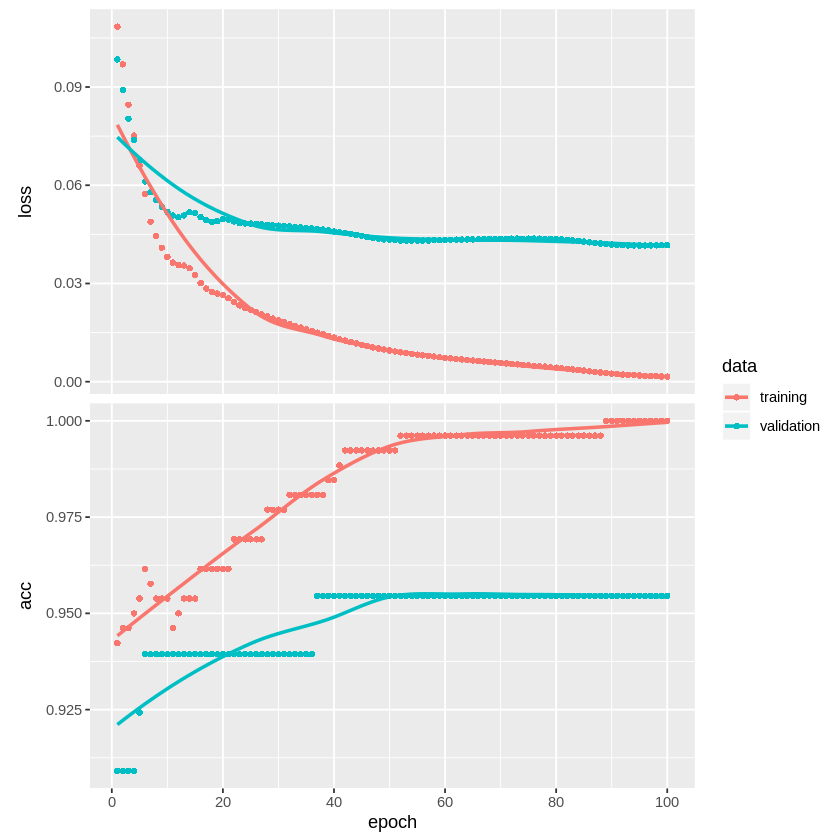

In [82]:
#### training curves
plot(history)